<a href="https://colab.research.google.com/github/jpedrocf/MachineLearningStudies/blob/main/ModelTestingRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

# Imports and Dataset Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [15]:
diabetes = load_diabetes()
diabetesdf = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetesdf['target'] = diabetes.target
diabetesdf.head(8)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0


# Splitting the data into training and testing sets (80% training, 20% testing)

In [17]:
array = diabetesdf.values
X = array[:,0:10]
y = array[:,10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

nfold = 10
kfold = KFold(n_splits=nfold, shuffle=True, random_state=7)

# Data Modeling

In [18]:
np.random.seed(7)

models = []
results = []
names = []

models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

for name, model in models:
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)


LR: MSE 3066.49 (612.06) - RMSE 55.38
Ridge: MSE 3566.43 (805.54) - RMSE 59.72
Lasso: MSE 3948.91 (890.99) - RMSE 62.84
KNN: MSE 3522.14 (721.76) - RMSE 59.35
CART: MSE 6431.26 (1584.05) - RMSE 80.20
SVM: MSE 5285.09 (1186.18) - RMSE 72.70


# Boxplot

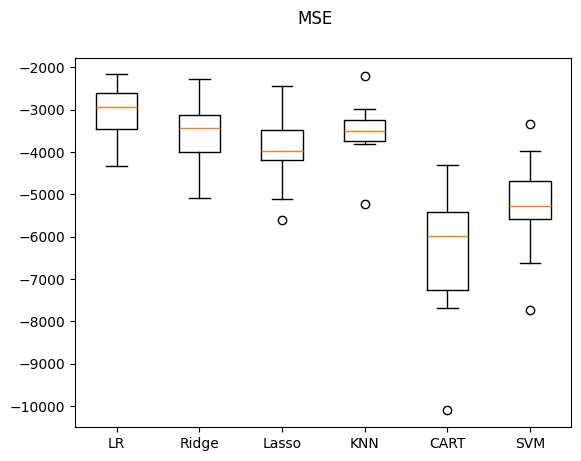

In [19]:
fig = plt.figure()
fig.suptitle('MSE')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Creating a Model

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("MSE %0.2f" % mean_squared_error(y_test, predictions))
print("RMSE %0.2f" % np.sqrt(mean_squared_error(y_test, predictions)))

MSE 2966.05
RMSE 54.46
